### TextBlob

In [214]:
import pandas as pd
import numpy as np
from textblob import TextBlob

In [192]:
conspiracy_comments = pd.read_csv('data/conspiracy_comment_body.csv.zip')
covid_comments = pd.read_csv('data/covid_comment_body.csv.zip', low_memory=False)
vaxx_comments = pd.read_csv('data/vaxx_comment_body.csv.zip', low_memory=False)

/Users/fiona/opt/anaconda3/envs/textanalysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2,6,9,17,19,20,21,30,32,33,38,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [193]:
conspiracy_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,editable
0,0,[],NaN,NaN,NoAttentionAtWrk,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
1,1,[],NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
2,2,[],NaN,NaN,2woke4u,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
3,3,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
4,4,[],NaN,NaN,SnaggleFish,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243984,236030,[],NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
243985,236031,[],NaN,NaN,Opposite_Strawberry1,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
243986,236032,[],NaN,NaN,ObjectiveAnalysis643,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
243987,236033,[],NaN,NaN,lalacestmoi,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN


In [194]:
# [removed] and [deleted] needs to be removed from comments
conspiracy_comments = conspiracy_comments[(conspiracy_comments['body']!='[removed]')&(conspiracy_comments['body']!='[deleted]')]
conspiracy_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,editable
0,0,[],NaN,NaN,NoAttentionAtWrk,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
2,2,[],NaN,NaN,2woke4u,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
3,3,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
4,4,[],NaN,NaN,SnaggleFish,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
5,5,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243982,236028,[],NaN,NaN,grad0ns,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
243985,236031,[],NaN,NaN,Opposite_Strawberry1,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
243986,236032,[],NaN,NaN,ObjectiveAnalysis643,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN
243987,236033,[],NaN,NaN,lalacestmoi,NaN,NaN,[],NaN,NaN,...,True,False,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN


In [195]:
covid_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason
0,0,[],NaN,NaN,Rockerblocker,NaN,NaN,[],NaN,NaN,...,1192,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
1,1,[],NaN,NaN,Testone1440,NaN,NaN,[],NaN,NaN,...,13,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
2,2,[],NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
3,3,[],NaN,NaN,redgreenyellowblu,NaN,NaN,[],NaN,NaN,...,-3,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
4,4,[],NaN,NaN,bigavz,NaN,NaN,[],NaN,NaN,...,14,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442005,442005,[],NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
442006,442006,[],NaN,NaN,YourWebcam,#ffd635,NaN,[],62de8578-6d21-11ea-aca0-0e867d0c4c3f,Moderator,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
442007,442007,[],NaN,NaN,generalmandrake,NaN,NaN,[],NaN,NaN,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
442008,442008,[],NaN,NaN,Evertraveler,NaN,NaN,[],NaN,NaN,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN


In [196]:
covid_comments = covid_comments[(covid_comments['body']!='[removed]')&(covid_comments['body']!='[deleted]')]
covid_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason
0,0,[],NaN,NaN,Rockerblocker,NaN,NaN,[],NaN,NaN,...,1192,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
1,1,[],NaN,NaN,Testone1440,NaN,NaN,[],NaN,NaN,...,13,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
3,3,[],NaN,NaN,redgreenyellowblu,NaN,NaN,[],NaN,NaN,...,-3,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
4,4,[],NaN,NaN,bigavz,NaN,NaN,[],NaN,NaN,...,14,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
6,6,[],NaN,NaN,strcrssd,NaN,NaN,[],NaN,NaN,...,5,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,442003,[],NaN,NaN,lovememychem,#94e044,NaN,[],28b4e296-5e4b-11ea-aa9a-0edecd70770b,MD/PhD Student,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
442006,442006,[],NaN,NaN,YourWebcam,#ffd635,NaN,[],62de8578-6d21-11ea-aca0-0e867d0c4c3f,Moderator,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
442007,442007,[],NaN,NaN,generalmandrake,NaN,NaN,[],NaN,NaN,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN
442008,442008,[],NaN,NaN,Evertraveler,NaN,NaN,[],NaN,NaN,...,1,True,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN


In [197]:
vaxx_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason
0,0,[],NaN,NaN,StevenFoxxe,NaN,NaN,[],NaN,NaN,...,12,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
1,1,[],NaN,NaN,JNPRSchnee,NaN,NaN,[],NaN,NaN,...,19,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
2,2,[],NaN,NaN,googleitmofugga,NaN,NaN,[],NaN,NaN,...,9,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
3,3,[],NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,...,0,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
4,4,[],NaN,NaN,You_Dont_Party,NaN,NaN,[],NaN,NaN,...,2,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133126,133126,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,2,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
133127,133127,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,1,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
133128,133128,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,2,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
133129,133129,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,1,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN


In [198]:
vaxx_comments = vaxx_comments[(vaxx_comments['body']!='[removed]')&(vaxx_comments['body']!='[deleted]')]
vaxx_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason
0,0,[],NaN,NaN,StevenFoxxe,NaN,NaN,[],NaN,NaN,...,12,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
1,1,[],NaN,NaN,JNPRSchnee,NaN,NaN,[],NaN,NaN,...,19,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
2,2,[],NaN,NaN,googleitmofugga,NaN,NaN,[],NaN,NaN,...,9,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
4,4,[],NaN,NaN,You_Dont_Party,NaN,NaN,[],NaN,NaN,...,2,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
5,5,[],NaN,NaN,gurlygirlish,NaN,NaN,[],NaN,NaN,...,7,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133126,133126,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,2,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
133127,133127,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,1,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
133128,133128,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,2,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN
133129,133129,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,1,True,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN


In [163]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [164]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [199]:
conspiracy_textblob = conspiracy_comments
covid_textblob = covid_comments
vaxx_textblob = vaxx_comments

In [200]:
conspiracy_textblob['body'] = conspiracy_textblob['body'].apply(lambda x: str(x))
covid_textblob['body'] = covid_textblob['body'].apply(lambda x: str(x))
vaxx_textblob['body'] = vaxx_textblob['body'].apply(lambda x: str(x))

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/2432676733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conspiracy_textblob['body'] = conspiracy_textblob['body'].apply(lambda x: str(x))
/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/2432676733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_textblob['body'] = covid_textblob['body'].apply(lambda x: str(x))
/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/2432676733.py:3: SettingWithCopyWarni

In [201]:
conspiracy_textblob['tb_polarity'] = conspiracy_textblob['body'].apply(get_polarity)
conspiracy_textblob['tb_subjectivity'] = conspiracy_textblob['body'].apply(get_subjectivity)
conspiracy_textblob

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/1790293155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conspiracy_textblob['tb_polarity'] = conspiracy_textblob['body'].apply(get_polarity)
/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/1790293155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conspiracy_textblob['tb_subjectivity'] = conspiracy_textblob['body'].apply(get_subjectivity)


,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,editable,tb_polarity,tb_subjectivity
0,0,[],NaN,NaN,NoAttentionAtWrk,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.500000,0.50000
2,2,[],NaN,NaN,2woke4u,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.000000,0.00000
3,3,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.250000,0.90000
4,4,[],NaN,NaN,SnaggleFish,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.125439,0.44693
5,5,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,-0.312500,0.68750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243982,236028,[],NaN,NaN,grad0ns,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.000000,0.00000
243985,236031,[],NaN,NaN,Opposite_Strawberry1,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.466667,0.60000
243986,236032,[],NaN,NaN,ObjectiveAnalysis643,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.000000,0.00000
243987,236033,[],NaN,NaN,lalacestmoi,NaN,NaN,[],NaN,NaN,...,conspiracy,t5_2qh4r,NaN,0.0,[],NaN,NaN,NaN,0.000000,0.00000


In [202]:
covid_textblob['tb_polarity'] = covid_textblob['body'].apply(get_polarity)
covid_textblob['tb_subjectivity'] = covid_textblob['body'].apply(get_subjectivity)
covid_textblob

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/3869785202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_textblob['tb_polarity'] = covid_textblob['body'].apply(get_polarity)
/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/3869785202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_textblob['tb_subjectivity'] = covid_textblob['body'].apply(get_subjectivity)


,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity
0,0,[],NaN,NaN,Rockerblocker,NaN,NaN,[],NaN,NaN,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,0.000000,0.000000
1,1,[],NaN,NaN,Testone1440,NaN,NaN,[],NaN,NaN,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,0.000000,0.000000
3,3,[],NaN,NaN,redgreenyellowblu,NaN,NaN,[],NaN,NaN,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,0.214286,0.497619
4,4,[],NaN,NaN,bigavz,NaN,NaN,[],NaN,NaN,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,-0.450000,0.950000
6,6,[],NaN,NaN,strcrssd,NaN,NaN,[],NaN,NaN,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,-0.200000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,442003,[],NaN,NaN,lovememychem,#94e044,NaN,[],28b4e296-5e4b-11ea-aa9a-0edecd70770b,MD/PhD Student,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,0.216667,0.354167
442006,442006,[],NaN,NaN,YourWebcam,#ffd635,NaN,[],62de8578-6d21-11ea-aca0-0e867d0c4c3f,Moderator,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,0.500000,0.600000
442007,442007,[],NaN,NaN,generalmandrake,NaN,NaN,[],NaN,NaN,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,0.100000,0.900000
442008,442008,[],NaN,NaN,Evertraveler,NaN,NaN,[],NaN,NaN,...,False,Coronavirus,t5_2x4yx,NaN,0,[],NaN,NaN,-0.071429,0.142857


In [203]:
vaxx_textblob['tb_polarity'] = vaxx_textblob['body'].apply(get_polarity)
vaxx_textblob['tb_subjectivity'] = vaxx_textblob['body'].apply(get_subjectivity)
vaxx_textblob

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/262560580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaxx_textblob['tb_polarity'] = vaxx_textblob['body'].apply(get_polarity)
/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/262560580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaxx_textblob['tb_subjectivity'] = vaxx_textblob['body'].apply(get_subjectivity)


,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity
0,0,[],NaN,NaN,StevenFoxxe,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,-0.127778,0.344444
1,1,[],NaN,NaN,JNPRSchnee,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,0.000000,0.000000
2,2,[],NaN,NaN,googleitmofugga,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,0.214286,0.500000
4,4,[],NaN,NaN,You_Dont_Party,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,0.037500,0.662500
5,5,[],NaN,NaN,gurlygirlish,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133126,133126,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,-0.100000,0.500000
133127,133127,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,0.077778,0.700000
133128,133128,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,0.030000,0.570000
133129,133129,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,False,vaxxhappened,t5_3p3pv,NaN,0,[],NaN,NaN,-0.036667,0.690000


In [230]:
def get_sentiment(score):
    if score < 0:
        return -1
    elif score > 0:
        return 1
    else:
        return 0

In [231]:
conspiracy_textblob['tb_sentiment'] = conspiracy_textblob['tb_polarity'].apply(get_sentiment)
conspiracy_textblob

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/2117008600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conspiracy_textblob['tb_sentiment'] = conspiracy_textblob['tb_polarity'].apply(get_sentiment)


,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,editable,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,0,[],NaN,NaN,NoAttentionAtWrk,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.500000,0.50000,1,0,2
2,2,[],NaN,NaN,2woke4u,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,1,1
3,3,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.250000,0.90000,1,0,1
4,4,[],NaN,NaN,SnaggleFish,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.125439,0.44693,1,0,1
5,5,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,-0.312500,0.68750,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243982,236028,[],NaN,NaN,grad0ns,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,0,0
243985,236031,[],NaN,NaN,Opposite_Strawberry1,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.466667,0.60000,1,0,2
243986,236032,[],NaN,NaN,ObjectiveAnalysis643,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,0,0
243987,236033,[],NaN,NaN,lalacestmoi,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,0,0


In [232]:
covid_textblob['tb_sentiment'] = covid_textblob['tb_polarity'].apply(get_sentiment)
covid_textblob

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/3539178103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_textblob['tb_sentiment'] = covid_textblob['tb_polarity'].apply(get_sentiment)


,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,0,[],NaN,NaN,Rockerblocker,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,1,1
1,1,[],NaN,NaN,Testone1440,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,0,0
3,3,[],NaN,NaN,redgreenyellowblu,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.214286,0.497619,1,-1,-1
4,4,[],NaN,NaN,bigavz,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.450000,0.950000,-1,-3,-3
6,6,[],NaN,NaN,strcrssd,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.200000,0.200000,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,442003,[],NaN,NaN,lovememychem,#94e044,NaN,[],28b4e296-5e4b-11ea-aa9a-0edecd70770b,MD/PhD Student,...,NaN,0,[],NaN,NaN,0.216667,0.354167,1,1,1
442006,442006,[],NaN,NaN,YourWebcam,#ffd635,NaN,[],62de8578-6d21-11ea-aca0-0e867d0c4c3f,Moderator,...,NaN,0,[],NaN,NaN,0.500000,0.600000,1,1,1
442007,442007,[],NaN,NaN,generalmandrake,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.100000,0.900000,1,0,0
442008,442008,[],NaN,NaN,Evertraveler,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.071429,0.142857,-1,0,0


In [233]:
vaxx_textblob['tb_sentiment'] = vaxx_textblob['tb_polarity'].apply(get_sentiment)
vaxx_textblob

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/2640672756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaxx_textblob['tb_sentiment'] = vaxx_textblob['tb_polarity'].apply(get_sentiment)


,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,0,[],NaN,NaN,StevenFoxxe,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.127778,0.344444,-1,0,-1
1,1,[],NaN,NaN,JNPRSchnee,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,-1,-1
2,2,[],NaN,NaN,googleitmofugga,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.214286,0.500000,1,1,1
4,4,[],NaN,NaN,You_Dont_Party,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.037500,0.662500,1,1,1
5,5,[],NaN,NaN,gurlygirlish,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133126,133126,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.100000,0.500000,-1,-2,-2
133127,133127,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.077778,0.700000,1,0,0
133128,133128,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.030000,0.570000,1,-1,-1
133129,133129,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.036667,0.690000,-1,-1,-1


In [234]:
conspiracy_textblob.to_csv('data/textblob/conspiracy_sentiment.csv')
covid_textblob.to_csv('data/textblob/covid_sentiment.csv')
vaxx_textblob.to_csv('data/textblob/vaxx_sentiment.csv')

### SentiStrength

In [235]:
from sentistrength import PySentiStr

senti = PySentiStr()
senti.setSentiStrengthPath('/Users/fiona/Desktop/MACS30200/replication-materials-fiofiofiona/data/sentistrength/SentiStrength.jar') # Note: Provide absolute path instead of relative path
senti.setSentiStrengthLanguageFolderPath('/Users/fiona/Desktop/MACS30200/replication-materials-fiofiofiona/data/sentistrength/SentiStrength_Data/') # Note: Provide absolute path instead of relative path

In [238]:
conspiracy_senti = conspiracy_textblob.copy(deep=True)
covid_senti = covid_textblob.copy(deep=True)
vaxx_senti = vaxx_textblob.copy(deep=True)

In [178]:
senti_dual_results = senti.getSentiment(conspiracy_senti['body'].to_list(), score='dual')
senti_dual_results

[(2, -2),
 (2, -1),
 (4, -4),
 (3, -3),
 (1, -1),
 (3, -4),
 (1, -3),
 (1, -2),
 (2, -3),
 (3, -4),
 (3, -2),
 (1, -2),
 (2, -3),
 (3, -1),
 (1, -3),
 (2, -1),
 (1, -1),
 (1, -5),
 (2, -4),
 (1, -1),
 (2, -1),
 (2, -2),
 (1, -1),
 (1, -3),
 (2, -3),
 (1, -3),
 (2, -3),
 (2, -1),
 (1, -3),
 (2, -1),
 (1, -1),
 (2, -1),
 (2, -4),
 (1, -2),
 (2, -3),
 (1, -1),
 (1, -1),
 (2, -3),
 (1, -1),
 (1, -1),
 (1, -3),
 (1, -1),
 (3, -2),
 (1, -3),
 (3, -4),
 (3, -2),
 (1, -2),
 (2, -5),
 (1, -2),
 (2, -4),
 (2, -1),
 (1, -3),
 (1, -3),
 (2, -3),
 (1, -3),
 (2, -4),
 (2, -3),
 (1, -2),
 (1, -4),
 (1, -4),
 (2, -1),
 (3, -4),
 (2, -2),
 (1, -1),
 (3, -4),
 (1, -1),
 (1, -1),
 (3, -1),
 (1, -2),
 (2, -4),
 (1, -1),
 (2, -2),
 (2, -3),
 (3, -3),
 (2, -3),
 (1, -3),
 (1, -4),
 (2, -1),
 (1, -2),
 (4, -1),
 (2, -2),
 (1, -3),
 (2, -1),
 (4, -5),
 (3, -4),
 (3, -2),
 (2, -2),
 (1, -2),
 (1, -3),
 (2, -1),
 (1, -1),
 (1, -1),
 (3, -3),
 (2, -4),
 (1, -4),
 (3, -2),
 (3, -1),
 (2, -1),
 (1, -4),
 (3, -1),


In [239]:
def get_sentistrength(comment_df):
    comment_df['ss_sentiment']= senti.getSentiment(comment_df['body'].to_list(), score='scale')
    comment_df['sentiment'] = np.where(comment_df['ss_sentiment'] == 0, comment_df['tb_polarity']*4, comment_df['ss_sentiment'])
    comment_df['sentiment'] = comment_df['sentiment'].apply(lambda x: round(x))

In [240]:
get_sentistrength(conspiracy_senti)
conspiracy_senti

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,editable,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,0,[],NaN,NaN,NoAttentionAtWrk,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.500000,0.50000,1,0,2
2,2,[],NaN,NaN,2woke4u,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,1,1
3,3,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.250000,0.90000,1,0,1
4,4,[],NaN,NaN,SnaggleFish,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.125439,0.44693,1,0,1
5,5,[],NaN,NaN,invadertocreator,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,-0.312500,0.68750,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243982,236028,[],NaN,NaN,grad0ns,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,0,0
243985,236031,[],NaN,NaN,Opposite_Strawberry1,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.466667,0.60000,1,0,2
243986,236032,[],NaN,NaN,ObjectiveAnalysis643,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,0,0
243987,236033,[],NaN,NaN,lalacestmoi,NaN,NaN,[],NaN,NaN,...,0.0,[],NaN,NaN,NaN,0.000000,0.00000,0,0,0


In [241]:
get_sentistrength(covid_senti)
covid_senti

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,0,[],NaN,NaN,Rockerblocker,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,1,1
1,1,[],NaN,NaN,Testone1440,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,0,0
3,3,[],NaN,NaN,redgreenyellowblu,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.214286,0.497619,1,-1,-1
4,4,[],NaN,NaN,bigavz,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.450000,0.950000,-1,-3,-3
6,6,[],NaN,NaN,strcrssd,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.200000,0.200000,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,442003,[],NaN,NaN,lovememychem,#94e044,NaN,[],28b4e296-5e4b-11ea-aa9a-0edecd70770b,MD/PhD Student,...,NaN,0,[],NaN,NaN,0.216667,0.354167,1,1,1
442006,442006,[],NaN,NaN,YourWebcam,#ffd635,NaN,[],62de8578-6d21-11ea-aca0-0e867d0c4c3f,Moderator,...,NaN,0,[],NaN,NaN,0.500000,0.600000,1,1,1
442007,442007,[],NaN,NaN,generalmandrake,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.100000,0.900000,1,0,0
442008,442008,[],NaN,NaN,Evertraveler,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.071429,0.142857,-1,0,0


In [242]:
get_sentistrength(vaxx_senti)
vaxx_senti

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,0,[],NaN,NaN,StevenFoxxe,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.127778,0.344444,-1,0,-1
1,1,[],NaN,NaN,JNPRSchnee,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,-1,-1
2,2,[],NaN,NaN,googleitmofugga,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.214286,0.500000,1,1,1
4,4,[],NaN,NaN,You_Dont_Party,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.037500,0.662500,1,1,1
5,5,[],NaN,NaN,gurlygirlish,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.000000,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133126,133126,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.100000,0.500000,-1,-2,-2
133127,133127,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.077778,0.700000,1,0,0
133128,133128,[],NaN,NaN,CreamPuff97,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,0.030000,0.570000,1,-1,-1
133129,133129,[],NaN,NaN,peosteve,NaN,NaN,[],NaN,NaN,...,NaN,0,[],NaN,NaN,-0.036667,0.690000,-1,-1,-1


In [243]:
conspiracy_senti['sentiment'].apply(lambda x: int(x)).value_counts()

 0    53568
-1    53059
 1    48581
-2    31549
 2    25812
-3     9414
 3     2340
-4      862
 4      260
Name: sentiment, dtype: int64

### Analysis
* Sentiment strength change in discussion tree

In [245]:
conspiracy_posts = pd.read_csv('data/conspiracy_posts.csv', low_memory=False)
covid_posts = pd.read_csv('data/covid_post.csv', low_memory=False)
vaxx_posts = pd.read_csv('data/vaxx_posts.csv', low_memory=False)

In [467]:
def get_top_comments(df):
    new_df = df[df['link_id'].apply(lambda x: type(x) == float) == False]
    new_df['link_id'] = new_df['link_id'].apply(lambda x: x[3:])
    new_df['parent_id'] = new_df['parent_id'].apply(lambda x: x[3:])
    new_df = new_df[new_df['link_id'] == new_df['parent_id']]
    new_df['top_cmt_count'] = new_df.groupby('parent_id')['parent_id'].transform('count')
    return new_df

In [472]:
def get_changes(df):
    agg_df = pd.DataFrame(index=df['parent_id'])
    agg_df['senti_start_end'] = df['sentiment'].agg(lambda x: np.mean(x.iloc[int(len(x)*0.9):]) - np.mean(x.iloc[:int(len(x)*0.1+1)]))
    agg_df['senti_min_max'] = df['sentiment'].agg(lambda x: np.mean(np.sort(x)[int(len(x)*0.9):]) - np.mean(np.sort(x)[:int(len(x)*0.1+1)]))
    agg_df['sub_start_end'] = df['tb_subjectivity'].agg(lambda x: np.mean(x.iloc[int(len(x)*0.9):]) - np.mean(x.iloc[:int(len(x)*0.1+1)]))
    agg_df['sub_min_max'] = df['tb_subjectivity'].agg(lambda x: np.mean(np.sort(x)[int(len(x)*0.9):]) - np.mean(np.sort(x)[:int(len(x)*0.1+1)]))
    agg_df['top_cmt_count'] = df['sentiment'].count()
    return agg_df.groupby('parent_id').first()

In [469]:
conspiracy_top_comments = get_top_comments(conspiracy_senti)
conspiracy_top_comments

/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/676843414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['link_id'] = new_df['link_id'].apply(lambda x: x[3:])
/var/folders/4y/rtcfy0516jd0xlzfv4qt72qc0000gn/T/ipykernel_56216/676843414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['parent_id'] = new_df['parent_id'].apply(lambda x: x[3:])


,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,treatment_tags,author_cakeday,unrepliable_reason,editable,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment,top_cmt_count
6,6,[],NaN,NaN,haohnoudont,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.050740,0.477211,1,-1,-1,446
11,11,[],NaN,NaN,daisylaundress,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.014286,0.588095,1,-1,-1,446
40,40,[],NaN,NaN,Ohshitwadddup,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.200000,0.200000,1,1,1,446
47,47,[],NaN,NaN,HorsedaFilla,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.153241,0.664815,1,-1,-1,446
51,51,[],NaN,NaN,EmpathyHawk1,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.083333,0.125000,1,0,0,446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243977,236023,[],NaN,NaN,staz5,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.000000,0.000000,0,0,0,13
243979,236025,[],NaN,NaN,WolfofFenris,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.000000,0.066667,0,0,0,13
243981,236027,[],NaN,NaN,Wanderinwoodpecker,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.091667,0.341667,1,-1,-1,13
243982,236028,[],NaN,NaN,grad0ns,NaN,NaN,[],NaN,NaN,...,[],NaN,NaN,NaN,0.000000,0.000000,0,0,0,13


In [471]:
conspiracy_agg = conspiracy_top_comments.sort_values(by='created_utc', ascending=True).groupby('parent_id', as_index=False).apply(get_changes)
conspiracy_agg

,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,top_cmt_count
,parent_id,,,,,
0,kaxhoq,0.750000,3.750000,-0.088983,0.802095,35
1,kbj2as,-1.400000,4.000000,-0.127245,0.835185,44
2,kbo0yc,-0.555556,4.888889,0.018993,0.914921,89
3,kbqpjk,0.000000,4.571429,0.333379,0.938605,68
4,kc9ubl,0.250000,4.750000,-0.348090,1.000000,39
...,...,...,...,...,...,...
901,r1vu5l,0.200000,5.200000,-0.194782,0.917857,42
902,r1xs70,-0.666667,3.333333,0.185417,0.670833,20
903,r261sd,-0.111111,4.777778,-0.053749,0.908532,85


In [473]:
covid_top_comments = get_top_comments(covid_senti)
covid_top_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment,top_cmt_count
14,14,[],NaN,NaN,BeansNMayo,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.000000,0.000000,0,0,0,608
20,20,[],NaN,NaN,Remote_Drink8793,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.000000,0.000000,0,0,0,608
21,21,[],NaN,NaN,Goatman_Jack,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.260000,0.580000,1,-1,-1,608
35,35,[],NaN,NaN,m0una,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,-0.400000,0.850000,-1,-1,-1,608
70,70,[],NaN,NaN,PandaFreak10736,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.800000,0.750000,1,2,2,608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441937,441937,[],NaN,NaN,Classicpass,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,-0.250000,0.700000,-1,-1,-1,23
441950,441950,[],NaN,NaN,PruHTP,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.120000,0.385000,1,0,0,23
441967,441967,[],NaN,NaN,Silberzahntiger,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.136364,0.454545,1,0,1,23
441971,441971,[],NaN,NaN,rooobertek,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.250000,0.333333,1,0,1,23


In [474]:
covid_agg = covid_top_comments.sort_values(by='created_utc', ascending=True).groupby('parent_id', as_index=False).apply(get_changes)
covid_agg

,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,top_cmt_count
,parent_id,,,,,
0,katxey,-0.333333,3.333333,-0.264583,0.866667,21
1,kb1c8l,-0.833333,4.166667,0.167095,0.865856,117
2,kb3e79,0.333333,4.722222,-0.015157,0.801497,178
3,kbgony,-0.567692,5.149231,-0.074524,0.898944,250
4,kbl4oe,-0.166667,5.416667,0.229167,0.900000,30
...,...,...,...,...,...,...
950,r0j8lx,-0.642857,4.571429,-0.070970,0.994898,133
951,r0sk04,-1.000000,3.000000,-0.550000,0.550000,9
952,r0zygy,1.000000,3.500000,-0.134597,0.714676,37


In [475]:
vaxx_top_comments = get_top_comments(vaxx_senti)
vaxx_top_comments

,Unnamed: 0,all_awardings,approved_at_utc,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,total_awards_received,treatment_tags,author_cakeday,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment,top_cmt_count
0,0,[],NaN,NaN,StevenFoxxe,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,-0.127778,0.344444,-1,0,-1,623
1,1,[],NaN,NaN,JNPRSchnee,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.000000,0.000000,0,-1,-1,623
2,2,[],NaN,NaN,googleitmofugga,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.214286,0.500000,1,1,1,623
4,4,[],NaN,NaN,You_Dont_Party,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.037500,0.662500,1,1,1,623
5,5,[],NaN,NaN,gurlygirlish,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.000000,0.000000,0,1,1,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133096,133096,[],NaN,NaN,uncle_chubb_06,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.000000,0.000000,0,0,0,7
133103,133103,[],NaN,NaN,GummyBearbaby23,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.000000,0.000000,0,0,0,7
133114,133114,[],NaN,NaN,Supafly22,NaN,NaN,[],NaN,NaN,...,0,[],NaN,NaN,0.800000,0.400000,1,0,3,7
133116,133116,[],NaN,NaN,David_The_Redditor,transparent,NaN,[],3a5dd36e-9587-11e9-9783-0efbbeb19ade,Marked 💉,...,0,[],NaN,NaN,-0.562500,0.733333,-1,-1,-1,7


In [476]:
vaxx_agg = vaxx_top_comments.sort_values(by='created_utc', ascending=True).groupby('parent_id', as_index=False).apply(get_changes)
vaxx_agg

,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,top_cmt_count
,parent_id,,,,,
0,kb5p4s,0.500000,4.250000,0.090536,1.000000,37
1,kbqlyn,0.400000,4.200000,-0.079532,1.000000,96
2,kc6tdf,1.500000,4.833333,0.150916,0.961574,51
3,kcmkvs,0.000000,5.571429,0.121885,0.834921,67
4,kcyfq2,0.500000,4.166667,0.009028,0.898148,53
...,...,...,...,...,...,...
926,r1ywni,0.800000,4.800000,-0.274722,0.927778,42
927,r23znb,-4.000000,4.000000,-0.166429,0.750000,7
928,r25za7,1.666667,4.000000,-0.152183,0.830556,24


* How does changes in sentiment strength and subjectivity vary across discussion length?

r/conspiracy

In [487]:
# correlation
conspiracy_correlation = pd.DataFrame(index=['top comment counts'], columns=['sentiment_start-end', 'sentiment_min-max', 'subjectivity_start-end', 'subjectivity_min-max'])
conspiracy_correlation['sentiment_start-end'] = np.corrcoef(conspiracy_agg['top_cmt_count'], conspiracy_agg['senti_start_end'])[0][1]
conspiracy_correlation['sentiment_min-max'] = np.corrcoef(conspiracy_agg['top_cmt_count'], conspiracy_agg['senti_min_max'])[0][1]
conspiracy_correlation['subjectivity_start-end'] = np.corrcoef(conspiracy_agg['top_cmt_count'], conspiracy_agg['sub_start_end'])[0][1]
conspiracy_correlation['subjectivity_min-max'] = np.corrcoef(conspiracy_agg['top_cmt_count'], conspiracy_agg['sub_min_max'])[0][1]
conspiracy_correlation

,sentiment_start-end,sentiment_min-max,subjectivity_start-end,subjectivity_min-max
top comment counts,0.148187,0.230214,0.009009,0.237295


In [496]:
# regression: start to end
import statsmodels.api as sm

X = sm.add_constant(conspiracy_agg['top_cmt_count'])
senti_start_end_reg = sm.OLS(conspiracy_agg['senti_start_end'], X).fit()
print(senti_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        senti_start_end   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     20.30
Date:                Sun, 01 May 2022   Prob (F-statistic):           7.50e-06
Time:                        22:52:40   Log-Likelihood:                -1227.4
No. Observations:                 906   AIC:                             2459.
Df Residuals:                     904   BIC:                             2468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5316      0.041    -12.984

In [497]:
# sentiment: min to max
senti_min_max_reg = sm.OLS(conspiracy_agg['senti_min_max'], X).fit()
print(senti_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          senti_min_max   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     50.59
Date:                Sun, 01 May 2022   Prob (F-statistic):           2.31e-12
Time:                        22:52:54   Log-Likelihood:                -865.76
No. Observations:                 906   AIC:                             1736.
Df Residuals:                     904   BIC:                             1745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0428      0.027    147.179

In [498]:
# subjectivity: start to end
sub_start_end_reg = sm.OLS(conspiracy_agg['sub_start_end'], X).fit()
print(sub_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          sub_start_end   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07337
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.787
Time:                        22:53:06   Log-Likelihood:                 208.76
No. Observations:                 906   AIC:                            -413.5
Df Residuals:                     904   BIC:                            -403.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0141      0.008     -1.680

In [499]:
# subjectivity: min to max
sub_min_max_reg = sm.OLS(conspiracy_agg['sub_min_max'], X).fit()
print(sub_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            sub_min_max   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     53.94
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.61e-13
Time:                        22:53:17   Log-Likelihood:                 760.25
No. Observations:                 906   AIC:                            -1517.
Df Residuals:                     904   BIC:                            -1507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8220      0.005    180.086

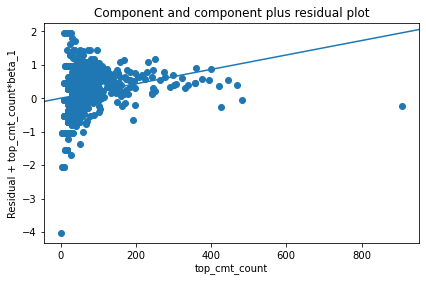

In [500]:
fig = sm.graphics.plot_ccpr(senti_min_max_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

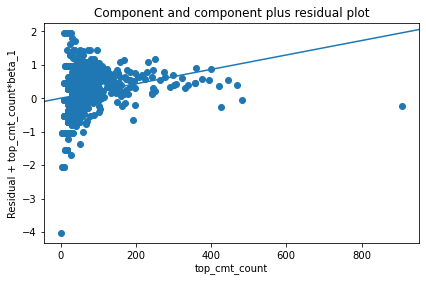

In [501]:
fig = sm.graphics.plot_ccpr(senti_min_max_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

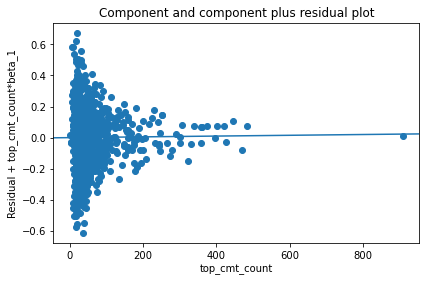

In [502]:
fig = sm.graphics.plot_ccpr(sub_start_end_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

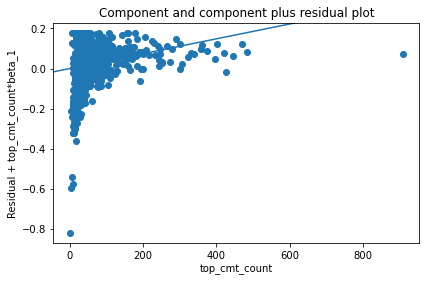

In [503]:
fig = sm.graphics.plot_ccpr(sub_min_max_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

r/Coronavirus

In [504]:
# correlation
covid_correlation = pd.DataFrame(index=['top comment counts'], columns=['sentiment_start-end', 'sentiment_min-max', 'subjectivity_start-end', 'subjectivity_min-max'])
covid_correlation['sentiment_start-end'] = np.corrcoef(covid_agg['top_cmt_count'], covid_agg['senti_start_end'])[0][1]
covid_correlation['sentiment_min-max'] = np.corrcoef(covid_agg['top_cmt_count'], covid_agg['senti_min_max'])[0][1]
covid_correlation['subjectivity_start-end'] = np.corrcoef(covid_agg['top_cmt_count'], covid_agg['sub_start_end'])[0][1]
covid_correlation['subjectivity_min-max'] = np.corrcoef(covid_agg['top_cmt_count'], covid_agg['sub_min_max'])[0][1]
covid_correlation

,sentiment_start-end,sentiment_min-max,subjectivity_start-end,subjectivity_min-max
top comment counts,0.092906,0.251091,0.035261,0.216598


In [507]:
X = sm.add_constant(covid_agg['top_cmt_count'])
senti_start_end_reg = sm.OLS(covid_agg['senti_start_end'], X).fit()
print(senti_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        senti_start_end   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.298
Date:                Sun, 01 May 2022   Prob (F-statistic):            0.00406
Time:                        22:57:26   Log-Likelihood:                -1241.0
No. Observations:                 955   AIC:                             2486.
Df Residuals:                     953   BIC:                             2496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4004      0.036    -11.257

In [509]:
senti_min_max_reg = sm.OLS(covid_agg['senti_min_max'], X).fit()
print(senti_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          senti_min_max   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     64.13
Date:                Sun, 01 May 2022   Prob (F-statistic):           3.39e-15
Time:                        22:58:04   Log-Likelihood:                -927.07
No. Observations:                 955   AIC:                             1858.
Df Residuals:                     953   BIC:                             1868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1458      0.026    161.911

In [510]:
sub_start_end_reg = sm.OLS(covid_agg['sub_start_end'], X).fit()
print(sub_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          sub_start_end   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.186
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.276
Time:                        22:58:30   Log-Likelihood:                 270.72
No. Observations:                 955   AIC:                            -537.4
Df Residuals:                     953   BIC:                            -527.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0191      0.007     -2.612

In [511]:
sub_min_max_reg = sm.OLS(covid_agg['sub_min_max'], X).fit()
print(sub_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            sub_min_max   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     46.91
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.33e-11
Time:                        22:58:46   Log-Likelihood:                 713.54
No. Observations:                 955   AIC:                            -1423.
Df Residuals:                     953   BIC:                            -1413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8000      0.005    174.108

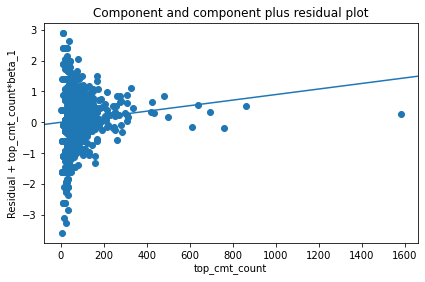

In [516]:
fig = sm.graphics.plot_ccpr(senti_start_end_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

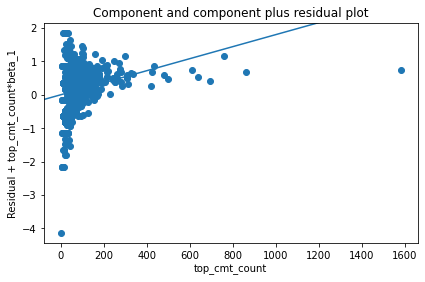

In [517]:
fig = sm.graphics.plot_ccpr(senti_min_max_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

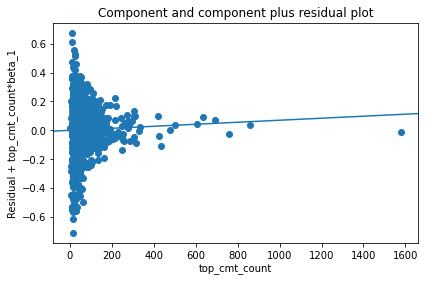

In [518]:
fig = sm.graphics.plot_ccpr(sub_start_end_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

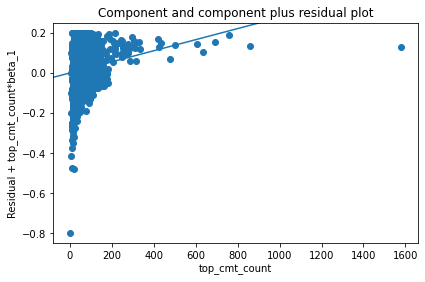

In [519]:
fig = sm.graphics.plot_ccpr(sub_min_max_reg, 'top_cmt_count')
fig.tight_layout(pad=1.0)

r/vaxxhappened

In [524]:
# correlation
vaxx_correlation = pd.DataFrame(index=['top comment counts'], columns=['sentiment_start-end', 'sentiment_min-max', 'subjectivity_start-end', 'subjectivity_min-max'])
vaxx_correlation['sentiment_start-end'] = np.corrcoef(vaxx_agg['top_cmt_count'], vaxx_agg['senti_start_end'])[0][1]
vaxx_correlation['sentiment_min-max'] = np.corrcoef(vaxx_agg['top_cmt_count'], vaxx_agg['senti_min_max'])[0][1]
vaxx_correlation['subjectivity_start-end'] = np.corrcoef(vaxx_agg['top_cmt_count'], vaxx_agg['sub_start_end'])[0][1]
vaxx_correlation['subjectivity_min-max'] = np.corrcoef(vaxx_agg['top_cmt_count'], vaxx_agg['sub_min_max'])[0][1]
vaxx_correlation

,sentiment_start-end,sentiment_min-max,subjectivity_start-end,subjectivity_min-max
top comment counts,0.011785,0.213758,-0.018326,0.213217


In [520]:
X = sm.add_constant(vaxx_agg['top_cmt_count'])
senti_start_end_reg = sm.OLS(vaxx_agg['senti_start_end'], X).fit()
print(senti_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        senti_start_end   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1290
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.720
Time:                        23:01:42   Log-Likelihood:                -1477.6
No. Observations:                 931   AIC:                             2959.
Df Residuals:                     929   BIC:                             2969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0260      0.052     -0.496

In [521]:
senti_min_max_reg = sm.OLS(vaxx_agg['senti_min_max'], X).fit()
print(senti_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          senti_min_max   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     44.48
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.40e-11
Time:                        23:02:01   Log-Likelihood:                -966.24
No. Observations:                 931   AIC:                             1936.
Df Residuals:                     929   BIC:                             1946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1949      0.030    138.807

In [522]:
sub_start_end_reg = sm.OLS(vaxx_agg['sub_start_end'], X).fit()
print(sub_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          sub_start_end   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3121
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.577
Time:                        23:02:15   Log-Likelihood:                -15.330
No. Observations:                 931   AIC:                             34.66
Df Residuals:                     929   BIC:                             44.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0011      0.011     -0.103

In [523]:
sub_min_max_reg = sm.OLS(vaxx_agg['sub_min_max'], X).fit()
print(sub_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            sub_min_max   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     44.25
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.94e-11
Time:                        23:02:36   Log-Likelihood:                 739.62
No. Observations:                 931   AIC:                            -1475.
Df Residuals:                     929   BIC:                            -1466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8644      0.005    178.710

In [527]:
all_start_end = conspiracy_agg.copy(deep=True)
all_start_end = all_start_end.append(covid_agg).append(vaxx_agg)
all_start_end

,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,top_cmt_count
,parent_id,,,,,
0,kaxhoq,0.750000,3.750000,-0.088983,0.802095,35
1,kbj2as,-1.400000,4.000000,-0.127245,0.835185,44
2,kbo0yc,-0.555556,4.888889,0.018993,0.914921,89
3,kbqpjk,0.000000,4.571429,0.333379,0.938605,68
4,kc9ubl,0.250000,4.750000,-0.348090,1.000000,39
...,...,...,...,...,...,...
926,r1ywni,0.800000,4.800000,-0.274722,0.927778,42
927,r23znb,-4.000000,4.000000,-0.166429,0.750000,7
928,r25za7,1.666667,4.000000,-0.152183,0.830556,24


In [537]:
all_corr = np.corrcoef(all_start_end, rowvar=False)
all_corr

array([[ 1.        ,  0.0320652 , -0.01390747,  0.06188547,  0.06223503],
       [ 0.0320652 ,  1.        ,  0.00252105,  0.34932288,  0.21869913],
       [-0.01390747,  0.00252105,  1.        , -0.00373701,  0.00854471],
       [ 0.06188547,  0.34932288, -0.00373701,  1.        ,  0.17975413],
       [ 0.06223503,  0.21869913,  0.00854471,  0.17975413,  1.        ]])

In [544]:
col_names = ['sentiment_start_end', 'sentiment_min_max', 'subjectivity_start_end', 'subjectivity_min_max', 'top_comment_counts']
corr_df = pd.DataFrame(all_corr, index=col_names, columns=col_names)
corr_df

,sentiment_start_end,sentiment_min_max,subjectivity_start_end,subjectivity_min_max,top_comment_counts
sentiment_start_end,1.000000,0.032065,-0.013907,0.061885,0.062235
sentiment_min_max,0.032065,1.000000,0.002521,0.349323,0.218699
subjectivity_start_end,-0.013907,0.002521,1.000000,-0.003737,0.008545
subjectivity_min_max,0.061885,0.349323,-0.003737,1.000000,0.179754
top_comment_counts,0.062235,0.218699,0.008545,0.179754,1.000000


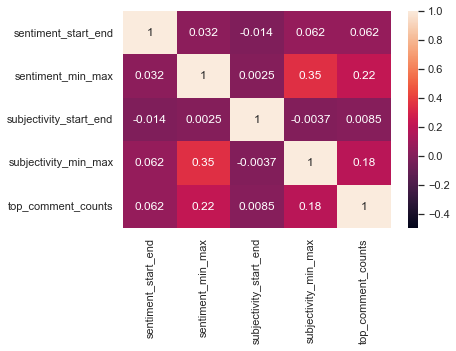

In [548]:
import seaborn as sns; 

sns.set_theme()
ax = sns.heatmap(corr_df, vmin=-0.5, vmax=1, annot=True)

* How does changes in sentiment strength and subjectivity vary across subreddits?

In [ ]:
conspiracy_agg['']

* Discussion length, average sentiment strength and subjectivity across subreddits

In [45]:
cons_avg_sentiment = conspiracy_comments.groupby(['post_id'])[['polarity','subjectivity','sentiment']].mean()
cons_avg_sentiment['length'] = conspiracy_comments.groupby(['post_id'])['post_id'].count()
cons_avg_sentiment

,polarity,subjectivity,sentiment,length
post_id,,,,
s0vurb,-0.060663,0.606250,0.000000,5
s0vwa2,0.095833,0.227083,0.666667,3
s0x8uz,0.018750,0.215625,0.500000,2
s0xmds,-0.196875,0.351562,-0.250000,4
s0y3jc,0.084134,0.242202,0.571429,7
...,...,...,...,...
ubw4bu,0.033630,0.428476,0.413793,29
ubxjgf,0.004229,0.411670,0.000000,29
ubxuhb,-0.013958,0.418646,-0.250000,4


In [47]:
covid_avg_sentiment = covid_comments.groupby(['post_id'])[['polarity','subjectivity','sentiment']].mean()
covid_avg_sentiment['length'] = covid_comments.groupby(['post_id'])['post_id'].count()
covid_avg_sentiment

,polarity,subjectivity,sentiment,length
post_id,,,,
rvq709,0.052000,0.448000,1.000000,1
rvqk43,-0.113333,0.636667,-0.333333,3
rvqrgp,0.052000,0.448000,1.000000,1
rvthuw,-0.040588,0.406603,0.333333,3
rvurew,0.052000,0.448000,1.000000,1
...,...,...,...,...
ubf0s5,0.076825,0.314325,0.166667,6
ubmxdw,0.132000,0.608000,1.000000,1
ubq7l3,0.052000,0.448000,1.000000,1


In [48]:
vaxx_avg_sentiment = vaxx_comments.groupby(['post_id'])[['polarity','subjectivity','sentiment']].mean()
vaxx_avg_sentiment['length'] = vaxx_comments.groupby(['post_id'])['post_id'].count()
vaxx_avg_sentiment

,polarity,subjectivity,sentiment,length
post_id,,,,
pbnicl,-0.029689,0.476283,0.032558,215
pbzknh,0.133333,0.116667,0.333333,3
pbzn9q,0.166071,0.494659,0.444444,9
pbzxpx,0.500000,0.500000,1.000000,1
pbzy57,-0.123333,0.722222,-1.000000,1
...,...,...,...,...
uck9q4,0.000000,0.500000,0.000000,2
uckfg6,-0.366667,0.570833,-1.000000,1
ucki3t,0.125000,0.478125,1.000000,1


(array([ 17.,  76., 192., 347., 484., 394., 170.,  62.,  17.,   6.]),
 array([0.071875  , 0.14270139, 0.21352778, 0.28435417, 0.35518056,
        0.42600694, 0.49683333, 0.56765972, 0.63848611, 0.7093125 ,
        0.78013889]),
 <BarContainer object of 10 artists>)

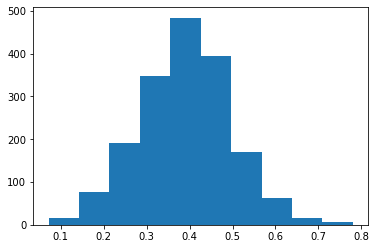

In [49]:
import matplotlib.pyplot as plt


plt.hist(cons_avg_sentiment['subjectivity'])

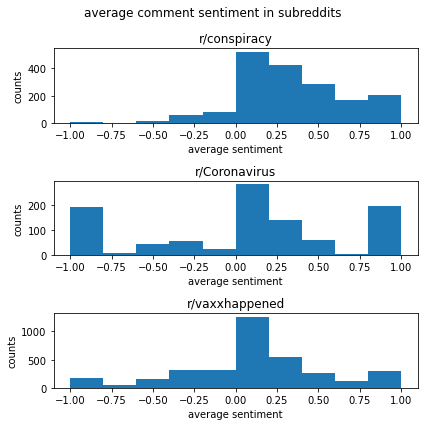

In [68]:
figure, ax = plt.subplots(3, figsize=(6, 6))
figure.suptitle('average comment sentiment in subreddits')
ax[0].hist(cons_avg_sentiment['sentiment'])
ax[0].set_title('r/conspiracy')
ax[0].set_xlabel('average sentiment')
ax[0].set_ylabel('counts')
ax[1].hist(covid_avg_sentiment['sentiment'])
ax[1].set_title('r/Coronavirus')
ax[1].set_xlabel('average sentiment')
ax[1].set_ylabel('counts')
ax[2].hist(vaxx_avg_sentiment['sentiment'])
ax[2].set_title('r/vaxxhappened')
ax[2].set_xlabel('average sentiment')
ax[2].set_ylabel('counts')
figure.tight_layout()


(array([1.716e+03, 2.900e+01, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  77.2, 153.4, 229.6, 305.8, 382. , 458.2, 534.4, 610.6,
        686.8, 763. ]),
 <BarContainer object of 10 artists>)

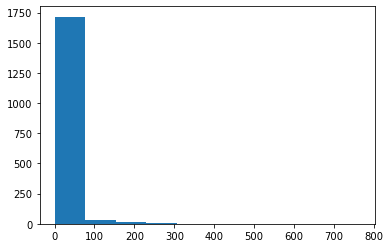

In [51]:
plt.hist(cons_avg_sentiment['length'])

In [11]:
# VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to access sentiment of a string/sentence
def sentiment_scores(document):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# SentimentIntensityAnalyzer.polarity_scores gives a sentiment dictionary, which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(document)
    # decide sentiment as positive, negative and neutral with thresholds
    if sentiment_dict['compound'] >= 0.01 :
        return 1
    elif sentiment_dict['compound'] <= - 0.01 :
        return -1
    else :
        return 0

In [7]:
import pandas as pd
from pmaw import PushshiftAPI
import datetime as dt
from tqdm.notebook import tqdm
api = PushshiftAPI()

In [86]:
[c for c in api.search_submissions(ids=['uck9q4'])]

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'maybesaydie',
  'author_flair_background_color': 'transparent',
  'author_flair_richtext': [],
  'author_flair_template_id': '3a5dd36e-9587-11e9-9783-0efbbeb19ade',
  'author_flair_text': 'living organism with tentacles',
  'author_flair_text_color': 'dark',
  'author_flair_type': 'text',
  'author_fullname': 't2_fpxd4',
  'author_is_blocked': False,
  'author_patreon_flair': False,
  'author_premium': True,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1651000430,
  'domain': 'i.redd.it',
  'full_link': 'https://www.reddit.com/r/vaxxhappened/comments/uck9q4/its_not_just_the_us_and_canada/',
  'gildings': {},
  'id': 'uck9q4',
  'is_created_from_ads_ui': False,
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': True,
  'is_robot_indexable': True,
  'is_self': False,
  'is_video': False,
  'link_flair_background_color': '',
 

In [89]:
start_epoch = int(dt.datetime(2020, 12, 11).timestamp())
vax_posts = api.search_submissions(subreddit="vaxxhappened", after=start_epoch)
# post_list = [post for post in conspiracy_posts]
len(vax_posts)

10257

In [90]:
vax_posts = pd.DataFrame(vax_posts)
vax_posts

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,is_gallery,gallery_data,media_metadata,author_cakeday,crosspost_parent,crosspost_parent_list,banned_by,suggested_sort,distinguished,edited
0,[],False,gooty16,None,[],None,text,t2_14ejtm5w,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Scothlawson,None,[],None,text,t2_ayw9rhnp,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,pinkgold22,None,[],None,text,t2_2edhdsyk,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,fourtwenty0420,None,[],None,text,t2_7ziuwg5g,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,DeltaVey,None,[],None,text,t2_jxp9s,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,[],False,maybesaydie,None,[],💉💉💉💉💉💉,text,t2_fpxd4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10253,[],False,taylorisnotfunny,None,[],None,text,t2_9ohuwvvg,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10254,[],False,maybesaydie,None,[],💉💉💉💉💉💉,text,t2_fpxd4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10255,[],False,HELPMELEARNMORE,None,[],None,text,t2_1i4fzztw,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
vax_posts = pd.read_csv('data/vaxx_posts.csv')
vax_posts

/Users/fiona/opt/anaconda3/envs/textanalysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,is_gallery,gallery_data,media_metadata,author_cakeday,crosspost_parent,crosspost_parent_list,banned_by,suggested_sort,distinguished,edited
0,0,[],False,gooty16,NaN,[],NaN,text,t2_14ejtm5w,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,Scothlawson,NaN,[],NaN,text,t2_ayw9rhnp,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,pinkgold22,NaN,[],NaN,text,t2_2edhdsyk,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,fourtwenty0420,NaN,[],NaN,text,t2_7ziuwg5g,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,DeltaVey,NaN,[],NaN,text,t2_jxp9s,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,10252,[],False,maybesaydie,NaN,[],💉💉💉💉💉💉,text,t2_fpxd4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10253,10253,[],False,taylorisnotfunny,NaN,[],NaN,text,t2_9ohuwvvg,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10254,10254,[],False,maybesaydie,NaN,[],💉💉💉💉💉💉,text,t2_fpxd4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10255,10255,[],False,HELPMELEARNMORE,NaN,[],NaN,text,t2_1i4fzztw,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vax_post_links = vax_posts[vax_posts['num_comments'] > 2].sort_values(by=['num_comments'], ascending=False)[:5000]['id']
vax_post_links

8907     pbe8nj
4042     pe5ty7
6282     kgony2
10254    pcb67h
8906     pbnicl
          ...  
5528     sqxh2k
5538     sqlcem
5560     sp8bu4
5561     sp6c0a
6        m71unu
Name: id, Length: 4497, dtype: object

In [93]:
# vax_posts.to_csv('data/vaxx_posts.csv')

In [9]:
vax_comments = api.search_submission_comment_ids(ids=vax_post_links.to_list())
vax_comments

In [ ]:
vax_comments_links = list(vax_comments)
vax_comments_links

In [ ]:
vax_comment_body = api.search_comments(ids=vax_comments_links)
vax_comment_body

In [ ]:
pd.DataFrame(vax_comment_body).to_csv('data/vax_comment_body.csv')